In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def quantizeWeight(W,BW):
    Wq = np.minimum(np.round(W*np.power(2.0,BW-1.0))*np.power(2.0,1.0-BW),1.0-np.power(2.0,1.0-BW))
    return Wq

def quantizeInput(X,BX):
    return np.minimum(np.round(X*np.power(2.0,BX))*np.power(2.0,-BX) ,1.0-np.power(2.0,-BX))



In [4]:
#print(quantizeWeight(-0.4344,3))
print(quantizeInput(0.22222,10))

0.22265625


In [5]:
def placeUniformLevels(M):
    #M is the number of levels
    return np.arange(-1,1.01,2.0/(M-1))

def getLloydMaxLevels(M,trials):
    levels = placeUniformLevels(M)
    for i in range(trials):
        thresholds = 0.5*(np.delete(levels,0)+np.delete(levels,M-1))
        for m in range(M):
            leftThreshold = -1 if m==0 else thresholds[m-1]
            rightThreshold = 1 if m==(M-1) else thresholds[m]
            if (rightThreshold<0):
                num1 = np.true_divide(np.power(rightThreshold,2.0),2.0)+np.true_divide(np.power(rightThreshold,3.0),3.0)
                num2 = np.true_divide(np.power(leftThreshold,2.0),2.0)+np.true_divide(np.power(leftThreshold,3.0),3.0)
                num = num1-num2
                denum1 = rightThreshold+np.true_divide(np.power(rightThreshold,2.0),2.0)
                denum2 = leftThreshold+np.true_divide(np.power(leftThreshold,2.0),2.0)
                denum = denum1-denum2
                levels[m] = np.true_divide(num,denum)
            elif (leftThreshold>0):
                num1 = np.true_divide(np.power(rightThreshold,2.0),2.0)-np.true_divide(np.power(rightThreshold,3.0),3.0)
                num2 = np.true_divide(np.power(leftThreshold,2.0),2.0)-np.true_divide(np.power(leftThreshold,3.0),3.0)
                num = num1-num2
                denum1 = rightThreshold-np.true_divide(np.power(rightThreshold,2.0),2.0)
                denum2 = leftThreshold-np.true_divide(np.power(leftThreshold,2.0),2.0)
                denum = denum1-denum2
                levels[m] = np.true_divide(num,denum)
            else:
                num1 = np.true_divide(np.power(rightThreshold,2.0),2.0)-np.true_divide(np.power(rightThreshold,3.0),3.0)
                num2 = np.true_divide(np.power(leftThreshold,2.0),2.0)+np.true_divide(np.power(leftThreshold,3.0),3.0)
                num = num1-num2
                denum1 = rightThreshold-np.true_divide(np.power(rightThreshold,2.0),2.0)
                denum2 = leftThreshold+np.true_divide(np.power(leftThreshold,2.0),2.0)
                denum = denum1-denum2
                levels[m] = np.true_divide(num,denum)
    return levels
    

print(placeUniformLevels(4))
print(getLloydMaxLevels(4,100))

[-1.         -0.33333333  0.33333333  1.        ]
[-0.58797734 -0.17595468  0.17595468  0.58797734]


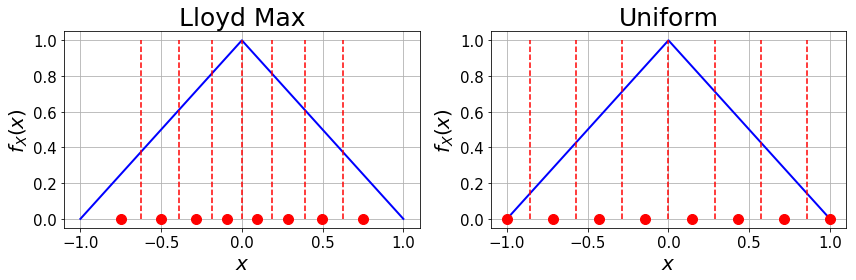

In [6]:
triangle_dist = np.asarray([[0,1,0],[-1,0,1]])
M=8
trials = 100
uniformLevels = placeUniformLevels(M)
uniformThresholds = 0.5*(np.delete(uniformLevels,0)+np.delete(uniformLevels,M-1))
LloydMaxLevels = getLloydMaxLevels(M,trials)
LloydMaxThresholds = 0.5*(np.delete(LloydMaxLevels,0)+np.delete(LloydMaxLevels,M-1))

plt.figure(figsize=(12,4))
ax=plt.subplot(121)
line1, = ax.plot(triangle_dist[1,:],triangle_dist[0,:],label='Distribution',linewidth=2,color='b')
line2, = ax.plot(LloydMaxLevels,np.zeros(M),label='Quantization Levels',linewidth=0,color='r',marker='o',markersize=10)
line3 = ax.stem(LloydMaxThresholds,np.ones(M-1),basefmt=' ',markerfmt=' ',linefmt='r--')
#line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
#plt.legend(loc=0,fontsize=20)
ax.grid()
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f_X(x)$',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('Lloyd Max',fontsize=25)

ax2=plt.subplot(122)
line1, = ax2.plot(triangle_dist[1,:],triangle_dist[0,:],label='Distribution',linewidth=2,color='b')
line2, = ax2.plot(uniformLevels,np.zeros(M),label='Quantization Levels',linewidth=0,color='r',marker='o',markersize=10)
line3 = ax2.stem(uniformThresholds,np.ones(M-1),basefmt=' ',markerfmt=' ',linefmt='r--')
#line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
#plt.legend(loc=0,fontsize=20)
ax2.grid()
ax2.set_xlabel(r'$x$',fontsize=20)
ax2.set_ylabel(r'$f_X(x)$',fontsize=20)
ax2.tick_params(axis='both',labelsize=15)
ax2.set_title('Uniform',fontsize=25)
#ax.set_xticks(np.arange(1,20,2))
plt.tight_layout()
plt.show()

In [9]:
def evaluate_sqnr(Nsample,quantizationLevels):
    #data = np.random.triangular(-1,0,1,Nsample)
    data = np.clip(np.random.normal(0,0.3,Nsample),-1,1)
    quantizedData = np.zeros(Nsample)
    for i in range(Nsample):
        quantizedData[i]=quantizationLevels[np.argmin(np.abs(data[i]-quantizationLevels))]
    SNR = 10*np.log10(np.true_divide(np.sum(np.var(data)),np.sum(np.var(data-quantizedData))))
    return SNR

Nsample=1000
M = 4
trials = 100
uniformLevels = placeUniformLevels(M)
LloydMaxLevels = getLloydMaxLevels(M,trials)
print(evaluate_sqnr(Nsample,uniformLevels))
print(evaluate_sqnr(Nsample,LloydMaxLevels))
    

3.3409623708388074
8.057478128779037


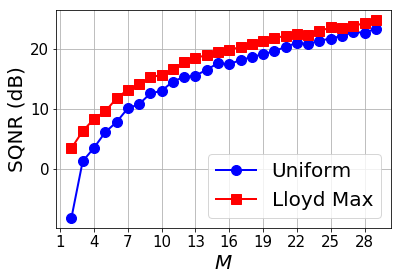

In [10]:
SQNR_uniform = []
SQNR_LM = []
Ms = []
Nsample=1000
trials = 100
for M in range(2,30):
    uniformLevels = placeUniformLevels(M)
    LloydMaxLevels = getLloydMaxLevels(M,trials)
    SQNR_uniform.append(evaluate_sqnr(Nsample,uniformLevels))
    SQNR_LM.append(evaluate_sqnr(Nsample,LloydMaxLevels))
    Ms.append(M)
    
fig,ax=plt.subplots()
line1, = ax.plot(Ms,SQNR_uniform,label='Uniform',linewidth=2,color='b',marker='o',markersize=10)
line2, = ax.plot(Ms,SQNR_LM,label='Lloyd Max',linewidth=2,color='r',marker='s',markersize=10)
plt.legend(handles=[line1,line2],loc=0,fontsize=20)
ax.grid()
ax.set_xlabel(r'$M$',fontsize=20)
ax.set_ylabel('SQNR (dB)',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_xticks(np.arange(1,30,3))
plt.show()